### Importing Libraries and IBMQ Account

In [1]:
import qiskit as q
import qiskit.visualization as qv
import numpy as np

from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.tools.monitor import job_monitor

import matplotlib.style
import matplotlib as plt
plt.style.use("dark_background")

IBMQ.save_account("8de7277a56e6becca30f1d2cd5957def658c0f26541eec4ffaf33b0224e975e510fddf7292950f2dd7237518abaa1ef5f53034fc7a726af7ae66ff76ffa9e801")
IBMQ.load_account()

C:\Users\Sanket Lalwani\AppData\Local\Temp\ipykernel_1244\104988094.py:14: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account("8de7277a56e6becca30f1d2cd5957def658c0f26541eec4ffaf33b0224e975e510fddf7292950f2dd7237518abaa1ef5f53034fc7a726af7ae66ff76ffa9e801")
configrc.store_credentials:WARNING:2023-03-27 00:42:53,435: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

#### The Deutsch Algorithm for balanced function f(x) = x

In [2]:
circuit = QuantumCircuit(2,1)
circuit.i(0) ; circuit.x(1)
circuit.h(0) ; circuit.h(1)
circuit.barrier()
circuit.cx(0,1)
circuit.barrier()
circuit.h(0) ; circuit.h(1)
circuit.measure(0,0)
circuit.draw()

┌───┐┌───┐ ░       ░ ┌───┐┌─┐
q_0: ┤ I ├┤ H ├─░───■───░─┤ H ├┤M├
     ├───┤├───┤ ░ ┌─┴─┐ ░ ├───┤└╥┘
q_1: ┤ X ├┤ H ├─░─┤ X ├─░─┤ H ├─╫─
     └───┘└───┘ ░ └───┘ ░ └───┘ ║ 
c: 1/═══════════════════════════╩═
                                0

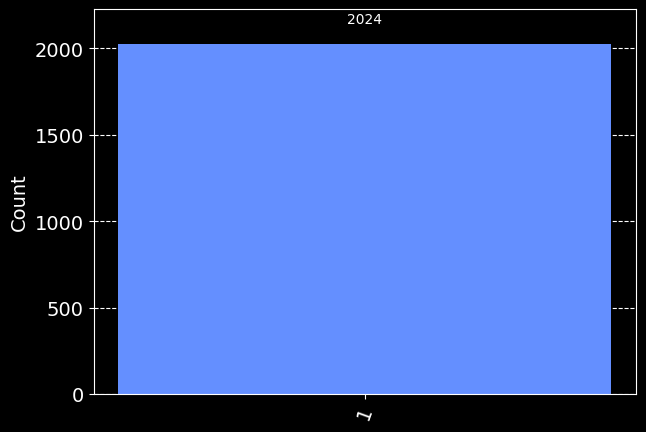

In [3]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(circuit, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts) #Visualizing o/p of simulator

In [4]:
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational == True))
t_qc = transpile(circuit, backend, optimization_level = 3)
job = backend.run(t_qc)
job_monitor(job)

Job Status: job has successfully run


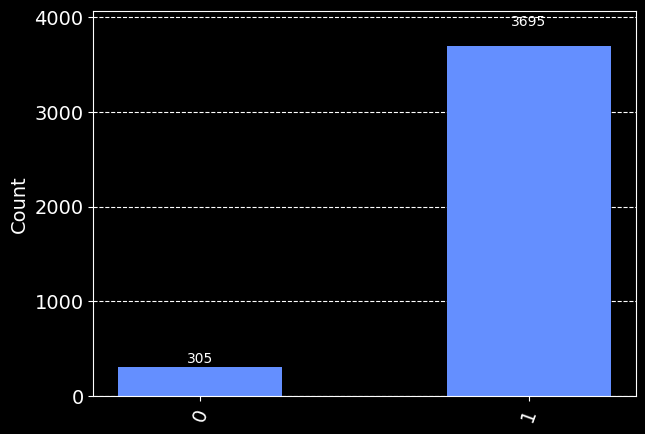

In [5]:
result = job.result()
counts = result.get_counts()
qv.plot_histogram(counts)

#### The Detusch algorithm for constant function f(x) = 0

In [6]:
circuit = QuantumCircuit(2,1)
circuit.i(0) ; circuit.x(1)
circuit.h(0) ; circuit.h(1)
circuit.barrier()
circuit.i(0) ; circuit.i(1) 
circuit.barrier()
circuit.h(0) ; circuit.h(1)
circuit.measure(0,0)
circuit.draw()

┌───┐┌───┐ ░ ┌───┐ ░ ┌───┐┌─┐
q_0: ┤ I ├┤ H ├─░─┤ I ├─░─┤ H ├┤M├
     ├───┤├───┤ ░ ├───┤ ░ ├───┤└╥┘
q_1: ┤ X ├┤ H ├─░─┤ I ├─░─┤ H ├─╫─
     └───┘└───┘ ░ └───┘ ░ └───┘ ║ 
c: 1/═══════════════════════════╩═
                                0

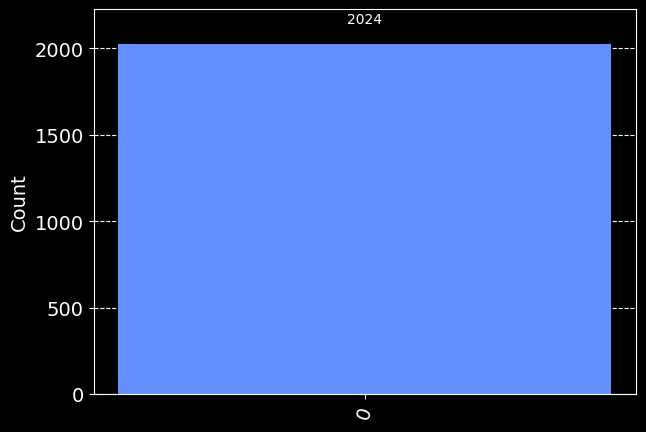

In [5]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(circuit, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts) #Visualizing o/p of simulator

In [ ]:
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational == True))
t_qc = transpile(circuit, backend, optimization_level = 3)
job = backend.run(t_qc)
job_monitor(job)

Job Status: job is queued (17)    

In [ ]:
result = job.result()
counts = result.get_counts()
qv.plot_histogram(counts)

#### The Deutsch Algorithm for balanced function f(x) = ~x

In [ ]:
circuit = QuantumCircuit(2,1)
circuit.i(0) ; circuit.x(1)
circuit.h(0) ; circuit.h(1)
circuit.barrier()
circuit.cx(0,1)
circuit.i(0) ; circuit.x(1) 
circuit.barrier()
circuit.h(0) ; circuit.h(1)
circuit.measure(0,0)
circuit.draw()

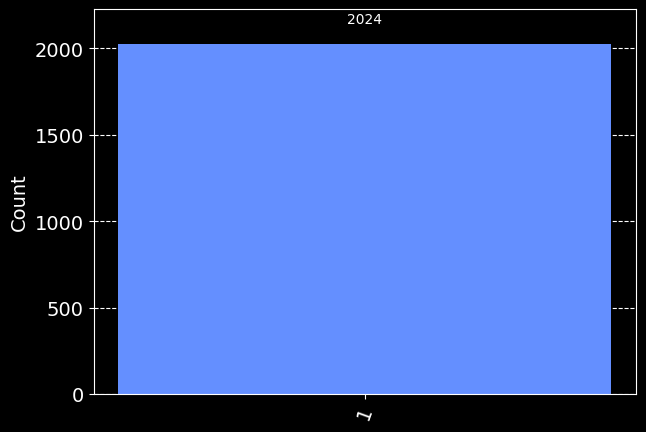

In [7]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(circuit, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts) #Visualizing o/p of simulator

In [ ]:
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational == True))
t_qc = transpile(circuit, backend, optimization_level = 3)
job = backend.run(t_qc)
job_monitor(job)

In [ ]:
result = job.result()
counts = result.get_counts()
qv.plot_histogram(counts)

#### The Detusch algorithm for constant function f(x) = 1

In [ ]:
circuit = QuantumCircuit(2,1)
circuit.i(0) ; circuit.x(1)
circuit.h(0) ; circuit.h(1)
circuit.barrier()
circuit.i(0) ; circuit.x(1) 
circuit.barrier()
circuit.h(0) ; circuit.h(1)
circuit.measure(0,0)
circuit.draw()

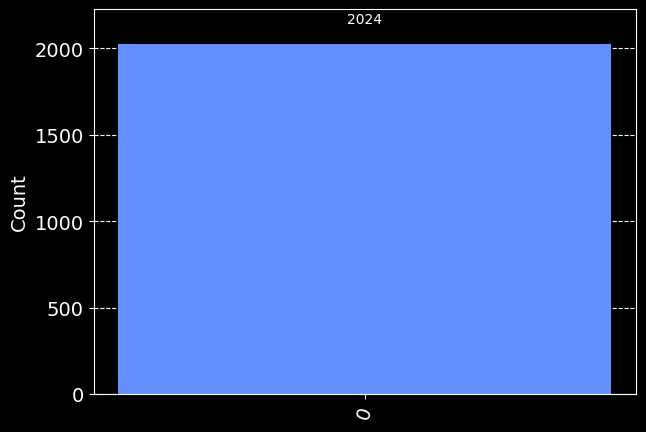

In [9]:
qasm_sim = Aer.get_backend("qasm_simulator") # Qiskit simulator backend
result = q.execute(circuit, qasm_sim, shots=2024).result()  # Results
counts = result.get_counts()
qv.plot_histogram(counts) #Visualizing o/p of simulator

In [ ]:
provider = IBMQ.get_provider(hub = 'ibm-q')
backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational == True))
t_qc = transpile(circuit, backend, optimization_level = 3)
job = backend.run(t_qc)
job_monitor(job)

In [ ]:
result = job.result()
counts = result.get_counts()
qv.plot_histogram(counts)